In [128]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [129]:
asset_data = pd.read_csv('ASSET_METADATA.csv')

In [130]:
schedule_data = pd.read_csv('Schedule Data.csv')

In [131]:
asset_data.head()

,ASSET_ID,RELEASE_YEAR,MPAA_RATING,GENRE,IMDB_RATING,IMDB_RANKING,IMDB_VOTES,Oscar-Nomination,Oscar-Wins,Other - Nominations,...,TOMATO_METER,TOMATO_RATING,TOMATO_REVIEWS,TOMATO_FRESH,TOMATO_ROTTEN,TOMATO_USER_METER,TOMATO_USER_RATINGS,TOMATO_USER_REVIEWS,TOMATO_IMAGE,BOX_OFFICE_EARNINGS
0,204750,2011.0,R,"Comedy, Thriller",6.2,46.0,"14,995",0,0,0,...,33.0,4.8,55.0,18.0,37.0,36.0,3.0,14994.0,rotten,"$94,700,000"
1,172902,2002.0,R,"Action, Sci-Fi, Sport",2.9,14.0,"21,493",0,0,2,...,3.0,2.6,117.0,4.0,113.0,14.0,2.1,36746.0,rotten,"$18,900,000"
2,198131,2007.0,PG-13,"Adventure, Comedy",2.3,17.0,"84,743",0,0,3,...,2.0,2.3,64.0,1.0,63.0,29.0,2.4,560170.0,rotten,"$39,700,000"
3,195393,2006.0,PG-13,"Comedy, Drama, Romance",6.8,62.0,254029,2,0,37,...,75.0,6.7,187.0,141.0,46.0,76.0,3.6,570016.0,certified,"$124,700,000"
4,185444,2002.0,R,"Horror, Mystery",5.4,28.0,"70,668",0,0,1,...,14.0,3.8,124.0,17.0,107.0,38.0,2.8,376512.0,rotten,"$30,100,000"


In [132]:
schedule_data.head()

,ASSET_ID,AIRING_START_DATE_TIME,AIRING_END_DATE_TIME,PREMIER_AIRING,EXHIBITION_AIRING,FREE_AIRING,SCHEDULED_RUNTIME,DAY_PART,AIRING_REVENUE,C3_RATING
0,174543,9/13/2013 21:15,9/13/2013 23:45,0,1,0,150,Late Fringe,197840,595443.0
1,181758,9/24/2014 0:00,9/24/2014 3:00,0,0,1,180,Late Night,89818,216841.0
2,191074,9/12/2013 14:15,9/12/2013 16:15,0,1,0,120,Daytime,60064,388053.0
3,196156,7/14/2013 18:00,7/14/2013 21:00,1,1,0,180,Early Fringe,164494,670869.0
4,174201,11/14/2014 15:30,11/14/2014 17:30,0,0,1,120,Daytime,86961,311122.0


In [133]:
schedule_data.columns

Index(['ASSET_ID', 'AIRING_START_DATE_TIME', 'AIRING_END_DATE_TIME',
       'PREMIER_AIRING', 'EXHIBITION_AIRING', 'FREE_AIRING',
       'SCHEDULED_RUNTIME', 'DAY_PART', 'AIRING_REVENUE', 'C3_RATING'],
      dtype='object')

In [134]:
asset_data.columns

Index(['ASSET_ID', 'RELEASE_YEAR', 'MPAA_RATING', 'GENRE', 'IMDB_RATING',
       'IMDB_RANKING', 'IMDB_VOTES', 'Oscar-Nomination', 'Oscar-Wins',
       'Other - Nominations', 'Other - Wins', 'TOMATO_METER', 'TOMATO_RATING',
       'TOMATO_REVIEWS', 'TOMATO_FRESH', 'TOMATO_ROTTEN', 'TOMATO_USER_METER',
       'TOMATO_USER_RATINGS', 'TOMATO_USER_REVIEWS', 'TOMATO_IMAGE',
       'BOX_OFFICE_EARNINGS'],
      dtype='object')

In [135]:
print('length of asset_metadata is {} \nlength of schedule data is {}'.format(len(asset_data), len(schedule_data)))

length of asset_metadata is 5401 
length of schedule data is 2517


In [136]:
len(asset_data['ASSET_ID'].unique())

5401

<AxesSubplot:xlabel='RELEASE_YEAR'>

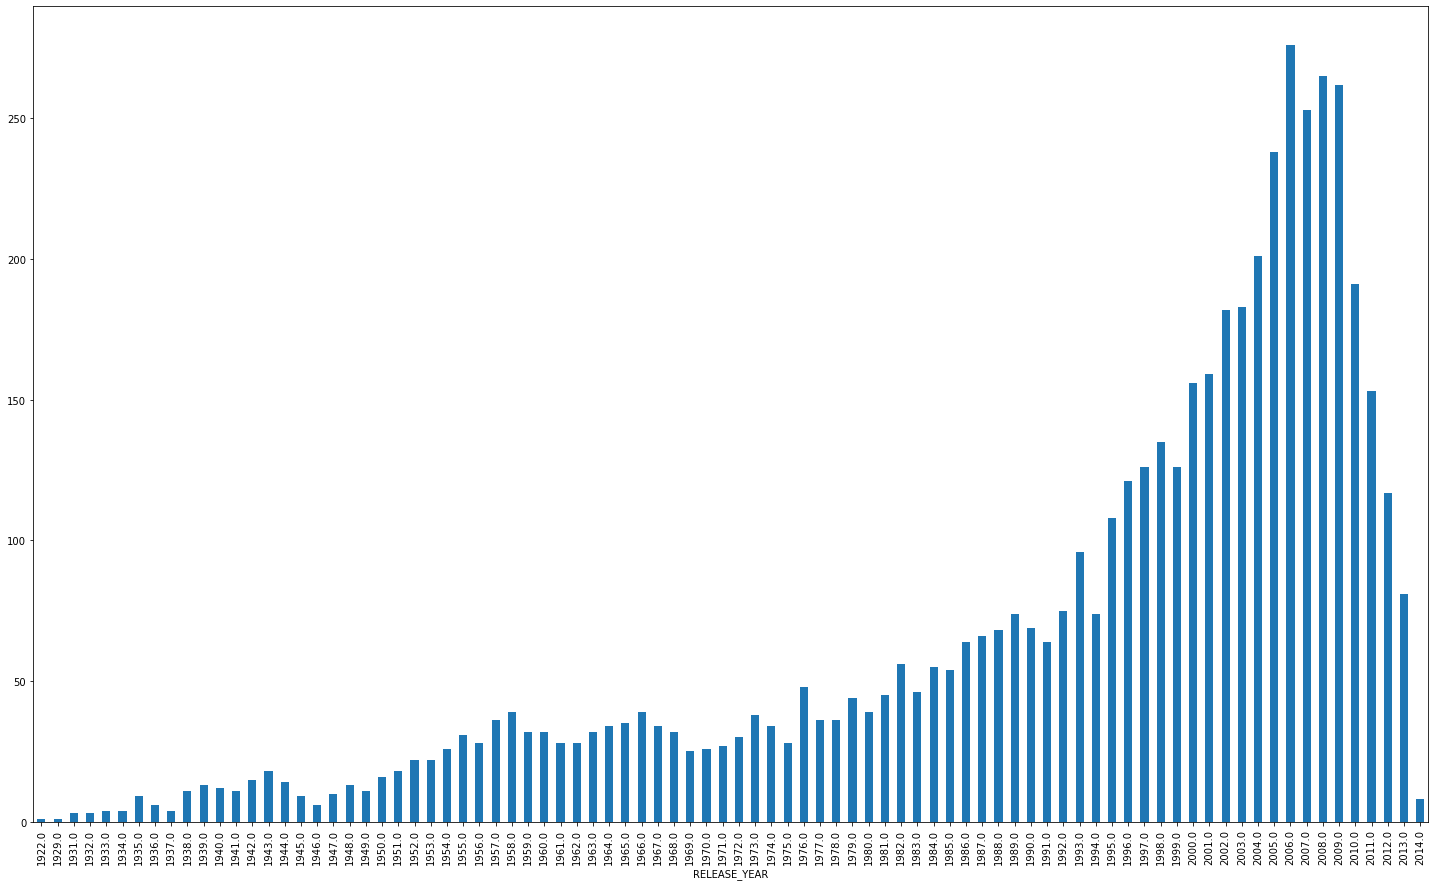

In [137]:
plt.figure(figsize=(25,15))
asset_data.groupby('RELEASE_YEAR')['ASSET_ID'].count().plot(kind = 'bar')

#### Highest number of movies are released in 2006

In [138]:
#let's find out columns with missing values.
var_na = [col for col in asset_data.columns if asset_data[col].isnull().mean()>0]

In [139]:
var_na

['RELEASE_YEAR',
 'MPAA_RATING',
 'GENRE',
 'IMDB_RANKING',
 'IMDB_VOTES',
 'TOMATO_METER',
 'TOMATO_RATING',
 'TOMATO_REVIEWS',
 'TOMATO_FRESH',
 'TOMATO_ROTTEN',
 'TOMATO_USER_METER',
 'TOMATO_USER_RATINGS',
 'TOMATO_USER_REVIEWS',
 'TOMATO_IMAGE',
 'BOX_OFFICE_EARNINGS']

<AxesSubplot:>

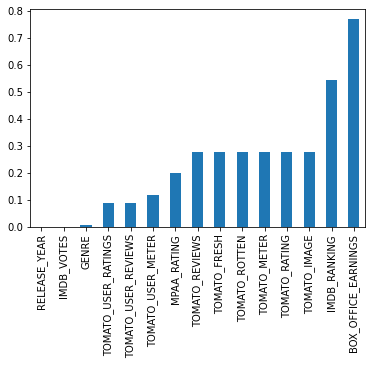

In [140]:
#let's find percentage of missing data in each column
asset_data[var_na].isnull().mean().sort_values(ascending = True).plot(kind='bar')

#### There are large number of missing values in imbd_ranking and box_office_earnings. So we will use columns with less percentage of missing data for analysis of data

array([[<AxesSubplot:title={'center':'ASSET_ID'}>,
        <AxesSubplot:title={'center':'RELEASE_YEAR'}>,
        <AxesSubplot:title={'center':'IMDB_RATING'}>,
        <AxesSubplot:title={'center':'IMDB_RANKING'}>],
       [<AxesSubplot:title={'center':'Oscar-Nomination'}>,
        <AxesSubplot:title={'center':'Oscar-Wins'}>,
        <AxesSubplot:title={'center':'Other - Nominations'}>,
        <AxesSubplot:title={'center':'Other - Wins'}>],
       [<AxesSubplot:title={'center':'TOMATO_METER'}>,
        <AxesSubplot:title={'center':'TOMATO_RATING'}>,
        <AxesSubplot:title={'center':'TOMATO_REVIEWS'}>,
        <AxesSubplot:title={'center':'TOMATO_FRESH'}>],
       [<AxesSubplot:title={'center':'TOMATO_ROTTEN'}>,
        <AxesSubplot:title={'center':'TOMATO_USER_METER'}>,
        <AxesSubplot:title={'center':'TOMATO_USER_RATINGS'}>,
        <AxesSubplot:title={'center':'TOMATO_USER_REVIEWS'}>]],
      dtype=object)

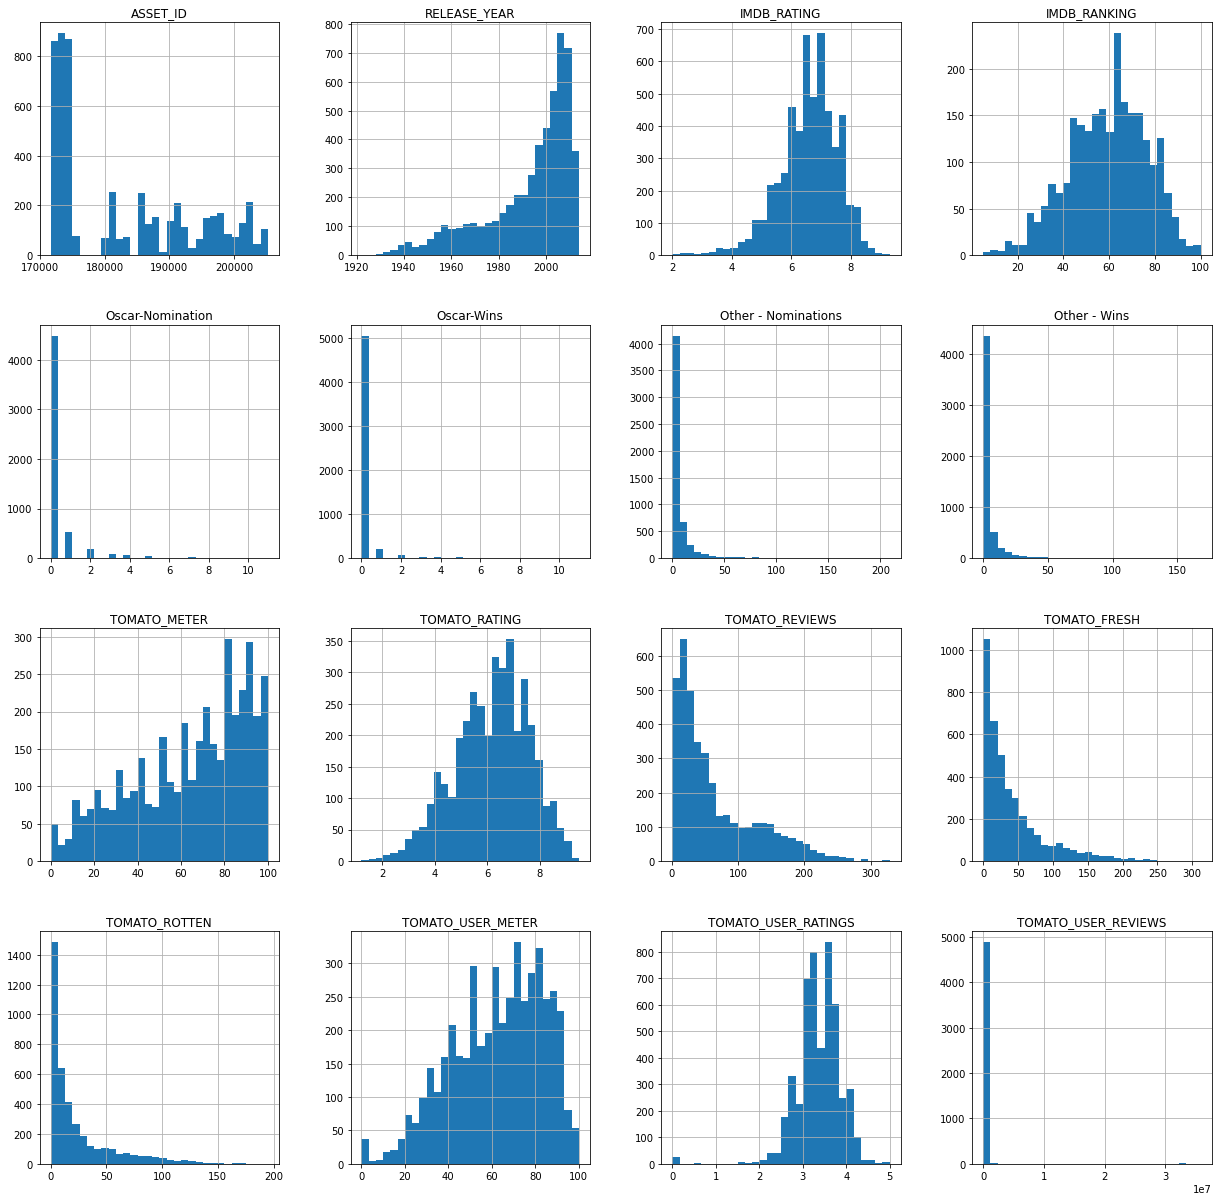

In [141]:
#lets check distribution of data, so that it will be easy to impute data in missing cells
asset_data.hist(bins=30, figsize=(21,21))

In [142]:
#now impute values in missing places
#lets first see TOMATO_USER_RATING
print(asset_data['TOMATO_USER_RATINGS'].mean(), asset_data['TOMATO_USER_RATINGS'].std())

3.338212041354151 0.5151648037091481


In [143]:
#now impute mean value in missing place
asset_data['TOMATO_USER_RATINGS'].fillna(asset_data['TOMATO_USER_RATINGS'].mean(), inplace=True)

In [144]:
#lets check new mean
print(asset_data['TOMATO_USER_RATINGS'].mean(), asset_data['TOMATO_USER_RATINGS'].std())

3.338212041354128 0.49233514447209364


In [145]:
print(asset_data['TOMATO_USER_METER'].mean(), asset_data['TOMATO_USER_METER'].std())

62.52570828961175 21.037949501170374


In [146]:
asset_data['TOMATO_USER_METER'].fillna(asset_data['TOMATO_USER_METER'].mean(), inplace=True)

In [147]:
#lets check new mean
print(asset_data['TOMATO_USER_METER'].mean(), asset_data['TOMATO_USER_METER'].std())

62.525708289611345 19.760248633606537


In [148]:
#for genre we can fill with mode
asset_data['GENRE'].fillna(asset_data['GENRE'].mode(), inplace = True)

In [149]:
asset_data['MPAA_RATING'].fillna(asset_data['MPAA_RATING'].mode(), inplace=True)

In [150]:
asset_data.isnull().sum()

ASSET_ID                  0
RELEASE_YEAR              1
MPAA_RATING            1066
GENRE                    27
IMDB_RATING               0
IMDB_RANKING           2934
IMDB_VOTES                1
Oscar-Nomination          0
Oscar-Wins                0
Other - Nominations       0
Other - Wins              0
TOMATO_METER           1499
TOMATO_RATING          1499
TOMATO_REVIEWS         1486
TOMATO_FRESH           1486
TOMATO_ROTTEN          1486
TOMATO_USER_METER         0
TOMATO_USER_RATINGS       0
TOMATO_USER_REVIEWS     468
TOMATO_IMAGE           1499
BOX_OFFICE_EARNINGS    4145
dtype: int64

In [151]:
#now analyse schudle_data

In [152]:
schedule_data.columns

Index(['ASSET_ID', 'AIRING_START_DATE_TIME', 'AIRING_END_DATE_TIME',
       'PREMIER_AIRING', 'EXHIBITION_AIRING', 'FREE_AIRING',
       'SCHEDULED_RUNTIME', 'DAY_PART', 'AIRING_REVENUE', 'C3_RATING'],
      dtype='object')

In [153]:
missing_col = [x for x in schedule_data.columns if schedule_data[x].isnull().mean()>0]

In [154]:
missing_col

['C3_RATING']

In [155]:
schedule_data['C3_RATING'].isnull().sum()

8

array([[<AxesSubplot:title={'center':'C3_RATING'}>]], dtype=object)

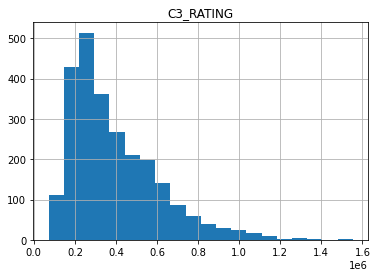

In [156]:
schedule_data[missing_col].hist(bins=20)

In [157]:
schedule_data['C3_RATING'].fillna(schedule_data['C3_RATING'].mean(), inplace=True)

<AxesSubplot:>

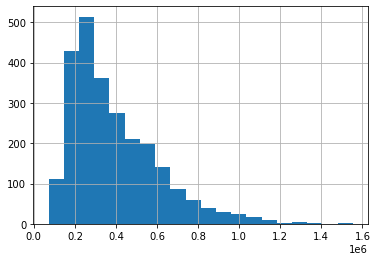

In [158]:
schedule_data['C3_RATING'].hist(bins=20)

<AxesSubplot:>

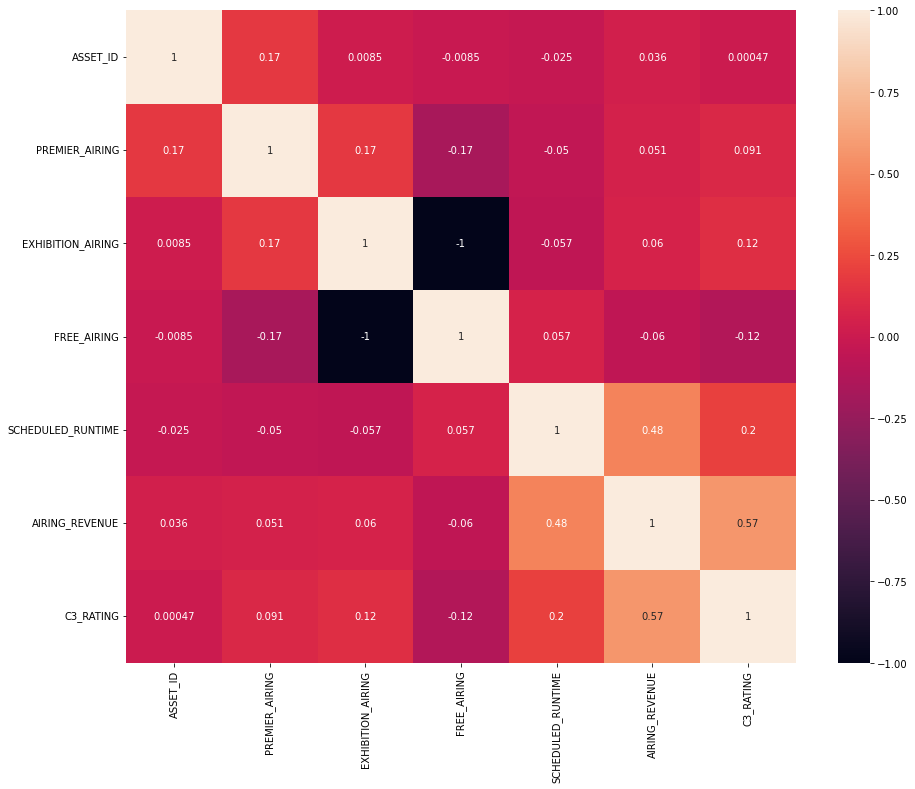

In [159]:
plt.figure(figsize=(15,12))
sns.heatmap(schedule_data.corr(), annot=True)

In [160]:
### we can see that there is high correlation between airing_revenue and c3_rating and next with scheduled_runtime

In [161]:
schedule_data.columns

Index(['ASSET_ID', 'AIRING_START_DATE_TIME', 'AIRING_END_DATE_TIME',
       'PREMIER_AIRING', 'EXHIBITION_AIRING', 'FREE_AIRING',
       'SCHEDULED_RUNTIME', 'DAY_PART', 'AIRING_REVENUE', 'C3_RATING'],
      dtype='object')

In [162]:
# now changing airing_start_date_time to date time
schedule_data['AIRING_START_DATE_TIME'] = pd.to_datetime(schedule_data['AIRING_START_DATE_TIME'])

In [163]:
schedule_data['weekday'] = schedule_data['AIRING_START_DATE_TIME'].dt.weekday

In [164]:
schedule_data['airing_time'] = np.round(schedule_data['AIRING_START_DATE_TIME'].dt.hour+(schedule_data['AIRING_START_DATE_TIME'].dt.minute)/60,2)

In [165]:
schedule_data['AIRING_END_DATE_TIME'] = pd.to_datetime(schedule_data['AIRING_END_DATE_TIME'])

In [166]:
schedule_data['airing_endtime'] = np.round(schedule_data['AIRING_END_DATE_TIME'].dt.hour+(schedule_data['AIRING_END_DATE_TIME'].dt.minute)/60,2)

In [167]:
schedule_data['month'] = schedule_data['AIRING_START_DATE_TIME'].dt.month

In [168]:
#now lets drop columns with more missing values


In [169]:
asset_data.drop(['RELEASE_YEAR',
 'MPAA_RATING',
 'IMDB_RANKING',
 'IMDB_VOTES',
 'TOMATO_METER',
 'TOMATO_RATING',
 'TOMATO_REVIEWS',
 'TOMATO_FRESH',
 'TOMATO_ROTTEN',
 'TOMATO_USER_REVIEWS',
 'TOMATO_IMAGE',
 'BOX_OFFICE_EARNINGS'],axis=1)

,ASSET_ID,GENRE,IMDB_RATING,Oscar-Nomination,Oscar-Wins,Other - Nominations,Other - Wins,TOMATO_USER_METER,TOMATO_USER_RATINGS
0,204750,"Comedy, Thriller",6.2,0,0,0,0,36.0,3.0
1,172902,"Action, Sci-Fi, Sport",2.9,0,0,2,0,14.0,2.1
2,198131,"Adventure, Comedy",2.3,0,0,3,1,29.0,2.4
3,195393,"Comedy, Drama, Romance",6.8,2,0,37,23,76.0,3.6
4,185444,"Horror, Mystery",5.4,0,0,1,1,38.0,2.8
...,...,...,...,...,...,...,...,...,...
5396,202141,"Action, Comedy, Thriller",6.4,0,0,2,1,57.0,3.1
5397,200915,"Documentary, Music",6.9,0,0,1,1,74.0,3.9
5398,188021,Drama,5.6,0,0,1,2,72.0,3.5
5399,197147,Drama,6.5,0,0,4,6,54.0,3.3


In [170]:
#now drop date and time related columns from schedule_data
schedule_data.drop(['AIRING_START_DATE_TIME','AIRING_END_DATE_TIME'],axis=1)

,ASSET_ID,PREMIER_AIRING,EXHIBITION_AIRING,FREE_AIRING,SCHEDULED_RUNTIME,DAY_PART,AIRING_REVENUE,C3_RATING,weekday,airing_time,airing_endtime,month
0,174543,0,1,0,150,Late Fringe,197840,595443.0,4,21.25,23.75,9
1,181758,0,0,1,180,Late Night,89818,216841.0,2,0.00,3.00,9
2,191074,0,1,0,120,Daytime,60064,388053.0,3,14.25,16.25,9
3,196156,1,1,0,180,Early Fringe,164494,670869.0,6,18.00,21.00,7
4,174201,0,0,1,120,Daytime,86961,311122.0,4,15.50,17.50,11
...,...,...,...,...,...,...,...,...,...,...,...,...
2512,185554,0,1,0,150,Late Night,23021,336985.0,5,1.50,4.00,9
2513,171859,0,1,0,150,Breakfast,50155,184164.0,2,9.50,12.00,1
2514,171986,0,1,0,150,Daytime,86038,461515.0,0,15.50,18.00,8
2515,185461,0,0,1,135,Daytime,43436,206781.0,3,10.00,12.25,9


In [171]:
#now merge both datasets
new_data = pd.merge(asset_data.drop(['RELEASE_YEAR',
 'MPAA_RATING',
 'IMDB_RANKING',
 'IMDB_VOTES',
 'TOMATO_METER',
 'TOMATO_RATING',
 'TOMATO_REVIEWS',
 'TOMATO_FRESH',
 'TOMATO_ROTTEN',
 'TOMATO_USER_REVIEWS',
 'TOMATO_IMAGE',
 'BOX_OFFICE_EARNINGS'],axis=1),schedule_data.drop(['AIRING_START_DATE_TIME','AIRING_END_DATE_TIME'],axis=1), how='inner')

In [172]:
new_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2517 entries, 0 to 2516
Data columns (total 20 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ASSET_ID             2517 non-null   int64  
 1   GENRE                2517 non-null   object 
 2   IMDB_RATING          2517 non-null   float64
 3   Oscar-Nomination     2517 non-null   int64  
 4   Oscar-Wins           2517 non-null   int64  
 5   Other - Nominations  2517 non-null   int64  
 6   Other - Wins         2517 non-null   int64  
 7   TOMATO_USER_METER    2517 non-null   float64
 8   TOMATO_USER_RATINGS  2517 non-null   float64
 9   PREMIER_AIRING       2517 non-null   int64  
 10  EXHIBITION_AIRING    2517 non-null   int64  
 11  FREE_AIRING          2517 non-null   int64  
 12  SCHEDULED_RUNTIME    2517 non-null   int64  
 13  DAY_PART             2517 non-null   object 
 14  AIRING_REVENUE       2517 non-null   int64  
 15  C3_RATING            2517 non-null   f

In [173]:
#now we can there are no null values in the dataset

In [174]:
#lets correlate airing revenue with other columns
new_data_corr= new_data.corr()['AIRING_REVENUE'].reset_index(name = 'corr_with_AIRING_REVENUE').sort_values(by="corr_with_AIRING_REVENUE")
new_data_corr

,index,corr_with_AIRING_REVENUE
17,month,-0.087325
10,FREE_AIRING,-0.059522
0,ASSET_ID,0.035577
8,PREMIER_AIRING,0.051338
9,EXHIBITION_AIRING,0.059522
14,weekday,0.093324
6,TOMATO_USER_METER,0.286322
7,TOMATO_USER_RATINGS,0.296801
3,Oscar-Wins,0.341576
1,IMDB_RATING,0.343619


In [175]:
new_data['DAY_PART'].unique()

array(['Late Night', 'Daytime', 'Late Fringe', 'Early Fringe',
       'Breakfast', 'Early Morning'], dtype=object)

In [176]:
#lets take day part of only prime time(fringe)
fringe = new_data[((new_data['DAY_PART']=='Early Fringe')| (new_data['DAY_PART']=='Late Fringe'))][['airing_time','weekday','GENRE','DAY_PART','AIRING_REVENUE']]

In [177]:
fringe

,airing_time,weekday,GENRE,DAY_PART,AIRING_REVENUE
2,22.00,3,"Horror, Mystery",Late Fringe,171319
6,22.00,5,"Drama, Sci-Fi, Thriller",Late Fringe,164907
7,20.00,3,"Drama, Sci-Fi, Thriller",Late Fringe,148627
8,21.00,4,"Drama, Sci-Fi, Thriller",Late Fringe,185327
9,17.00,1,"Action, Comedy, Crime",Early Fringe,127670
...,...,...,...,...,...
2492,17.50,3,"Action, Family, Romance",Early Fringe,137468
2494,17.50,5,"Action, Family, Romance",Early Fringe,112542
2495,20.00,3,"Action, Family, Romance",Late Fringe,118896
2511,22.02,2,"Comedy, Drama, Family",Late Fringe,178446


In [178]:
from scipy import stats
from scipy.stats import chi2_contingency

In [179]:
r = pd.pivot_table(fringe, values= 'AIRING_REVENUE', index= 'weekday', columns= 'GENRE', aggfunc=np.sum).fillna(0)

In [180]:
r

GENRE,Action,"Action, Adventure","Action, Adventure, Comedy","Action, Adventure, Crime","Action, Adventure, Drama","Action, Adventure, Family","Action, Adventure, Fantasy","Action, Adventure, Mystery","Action, Adventure, Sci-Fi","Action, Adventure, Thriller",...,"Family, Fantasy",Horror,"Horror, Mystery","Horror, Mystery, Thriller","Horror, Sci-Fi","Horror, Thriller","Musical, Romance","Mystery, Thriller","Short, Documentary",Western
weekday,,,,,,,,,,,,,,,,,,,,,
0,112231.0,475085.0,748896.0,391987.0,1013094.0,265569.0,1458589.0,0.0,832928.0,598402.0,...,165453.0,293819.0,171216.0,269460.0,0.0,442878.0,161800.0,258351.0,0.0,0.0
1,0.0,228503.0,468260.0,257307.0,847304.0,0.0,2143518.0,0.0,509108.0,854908.0,...,392229.0,253006.0,0.0,0.0,128718.0,579115.0,0.0,0.0,147784.0,0.0
2,0.0,449466.0,0.0,0.0,163772.0,238149.0,2220957.0,0.0,1320443.0,1434541.0,...,0.0,824322.0,0.0,137770.0,0.0,149673.0,300816.0,291672.0,0.0,245181.0
3,0.0,433700.0,0.0,0.0,0.0,0.0,1166268.0,270301.0,748694.0,1615187.0,...,0.0,0.0,171319.0,135835.0,0.0,464208.0,271952.0,0.0,0.0,0.0
4,0.0,202826.0,167087.0,0.0,0.0,0.0,1097921.0,0.0,1087701.0,1825901.0,...,0.0,0.0,0.0,0.0,86513.0,104586.0,0.0,0.0,0.0,0.0
5,0.0,0.0,605494.0,0.0,0.0,244042.0,441274.0,213647.0,1167281.0,1137146.0,...,0.0,112007.0,0.0,0.0,0.0,193962.0,0.0,0.0,0.0,498477.0
6,0.0,0.0,375949.0,0.0,158684.0,0.0,661972.0,216047.0,765512.0,882169.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [181]:
'''
Null hypothesis: a movie of a specific genre does not generate more revenue if it’s shown 
during the Prime time (fringe) of a weekend against the primetime of any weekday

Alternate hypothesis:a movie of a specific genre can generate more revenue if it’s shown 
during the Prime time (fringe) of a weekend against the primetime of any weekday.

'''

'\nNull hypothesis: a movie of a specific genre does not generate more revenue if it’s shown \nduring the Prime time (fringe) of a weekend against the primetime of any weekday\n\nAlternate hypothesis:a movie of a specific genre can generate more revenue if it’s shown \nduring the Prime time (fringe) of a weekend against the primetime of any weekday.\n\n'

In [182]:
chi2, p, dof, tb1 = chi2_contingency(r)

In [183]:
chi2,p,dof

(110494833.10390338, 0.0, 594)

In [184]:
pd.DataFrame(tb1, index=r.index, columns= r.columns)

GENRE,Action,"Action, Adventure","Action, Adventure, Comedy","Action, Adventure, Crime","Action, Adventure, Drama","Action, Adventure, Family","Action, Adventure, Fantasy","Action, Adventure, Mystery","Action, Adventure, Sci-Fi","Action, Adventure, Thriller",...,"Family, Fantasy",Horror,"Horror, Mystery","Horror, Mystery, Thriller","Horror, Sci-Fi","Horror, Thriller","Musical, Romance","Mystery, Thriller","Short, Documentary",Western
weekday,,,,,,,,,,,,,,,,,,,,,
0,17786.734093,283618.461899,374921.615494,102902.225997,345945.805178,118507.438097,1.456540e+06,110937.485464,1.019312e+06,1.323058e+06,...,88383.258121,235055.072274,54286.061448,86066.708396,34110.509266,306573.493392,116416.727009,87169.434878,23421.289226,117857.339789
1,16072.020056,256276.480216,338777.635744,92982.029831,312595.212253,107082.835551,1.316124e+06,100242.657366,9.210457e+05,1.195510e+06,...,79862.749941,212394.800309,49052.662720,77769.525100,30822.116426,277018.552628,105193.677577,78765.944231,21163.380990,106495.409383
2,19809.936716,315879.449952,417568.140256,114607.132164,385296.394040,131987.403467,1.622218e+06,123556.385056,1.135256e+06,1.473554e+06,...,98436.663020,261792.079546,60460.983800,95856.610762,37990.506092,341445.566745,129658.878504,97084.770002,26085.410337,131263.357879
3,18693.719834,298080.807809,394039.715409,108149.442900,363586.363084,124550.400008,1.530812e+06,116594.438394,1.071289e+06,1.390524e+06,...,92890.120062,247041.061268,57054.230324,90455.444234,35849.881171,322206.368200,122353.078840,91614.401230,24615.593660,123867.151719
4,18029.099475,287483.100383,380030.367914,104304.391075,350659.727759,120122.242729,1.476387e+06,112449.140498,1.033201e+06,1.341087e+06,...,89587.585013,238257.976880,55025.773528,87239.469546,34575.305479,310750.921450,118003.043218,88357.221986,23740.432116,119463.286058
5,13595.246674,216783.077246,286570.419248,78653.064606,264422.829546,90580.870283,1.113303e+06,84794.795514,7.791083e+05,1.011276e+06,...,67555.527042,179663.769236,41493.418212,65784.877929,26072.284278,234328.699389,88982.840379,66627.744217,17902.005100,90083.969232
6,8244.243153,131458.622496,173778.105935,47695.713427,160347.668140,54928.809865,6.751139e+05,51420.097707,4.724562e+05,6.132444e+05,...,40966.096800,108949.240486,25161.869968,39892.364033,15810.397288,142098.398197,53959.754473,40403.483455,10855.888570,54627.485940


In [185]:
stats.chi2.ppf(0.95, 594)

651.8078441697387

In [186]:
#since p<0.05 we fail to reject null hypothesis

In [187]:
# Therefore a movie of a specific genre can generate more revenue if it is shown during prime time of a weekend compared to weekday

#Is there an interaction between when the movie was shown and asset characteristics, like genre?
#lets create pivot table

In [188]:
new_pivot_table = pd.pivot_table(new_data[['airing_time','GENRE']],index='GENRE',columns='airing_time',aggfunc=len)

In [189]:
new_pivot_table.fillna(0,inplace= True)

In [190]:
new_pivot_table

airing_time,0.00,0.02,0.03,0.07,0.13,0.25,0.28,0.50,0.52,0.53,...,22.52,22.75,22.77,23.00,23.02,23.25,23.50,23.52,23.57,23.75
GENRE,,,,,,,,,,,,,,,,,,,,,
Action,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
"Action, Adventure",0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
"Action, Adventure, Comedy",1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
"Action, Adventure, Crime",1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
"Action, Adventure, Drama",0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,3.0,3.0,0.0,0.0,0.0,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
"Romance, Western",0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
"Sci-Fi, Thriller",0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
"Short, Documentary",0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [191]:
#lets make a hypothesis
# null hypothesis: there is no interaction between when the movie was shown and asset characteristics, like genre
# alternate hypothesis: there is an interaction between when the movie was shown and asset characteristics, like genre

In [192]:
from scipy.stats import chi2_contingency,chi2

In [193]:
chi2,p,dof, tb2= chi2_contingency(new_pivot_table)

In [194]:
chi2,p,dof

(19700.562794308673, 4.12536629959038e-16, 18125)

In [195]:
stats.chi2.ppf(0.95, 18125)

18439.303700303775

In [196]:
#p<0.05 so there is an interaction between genre and airing time

<AxesSubplot:xlabel='month'>

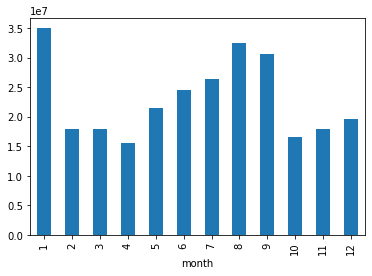

In [197]:
new_data.groupby('month')['AIRING_REVENUE'].sum().plot(kind = 'bar')

In [198]:
#highest revenue is obtained in the month of january

<AxesSubplot:xlabel='weekday'>

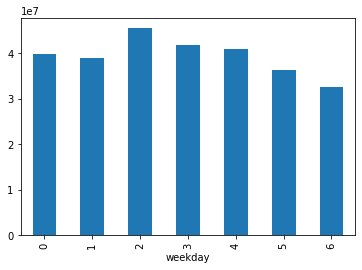

In [199]:
new_data.groupby('weekday')['AIRING_REVENUE'].sum().plot(kind = 'bar')

In [200]:
#highest revenue is obtained on tuesdays

In [201]:
#so we can say some seasonality and holiday effects are there on revenue

# OLS model

In [202]:
import statsmodels.api as sm

In [203]:
X = pd.get_dummies(new_data.drop(['ASSET_ID', 'AIRING_REVENUE'],axis=1),drop_first = True)

In [204]:
X.columns

Index(['IMDB_RATING', 'Oscar-Nomination', 'Oscar-Wins', 'Other - Nominations',
       'Other - Wins', 'TOMATO_USER_METER', 'TOMATO_USER_RATINGS',
       'PREMIER_AIRING', 'EXHIBITION_AIRING', 'FREE_AIRING',
       ...
       'GENRE_Romance, Western', 'GENRE_Sci-Fi, Thriller',
       'GENRE_Short, Documentary', 'GENRE_Western', 'GENRE_Western, Comedy',
       'DAY_PART_Daytime', 'DAY_PART_Early Fringe', 'DAY_PART_Early Morning',
       'DAY_PART_Late Fringe', 'DAY_PART_Late Night'],
      dtype='object', length=166)

In [205]:
new_data.columns

Index(['ASSET_ID', 'GENRE', 'IMDB_RATING', 'Oscar-Nomination', 'Oscar-Wins',
       'Other - Nominations', 'Other - Wins', 'TOMATO_USER_METER',
       'TOMATO_USER_RATINGS', 'PREMIER_AIRING', 'EXHIBITION_AIRING',
       'FREE_AIRING', 'SCHEDULED_RUNTIME', 'DAY_PART', 'AIRING_REVENUE',
       'C3_RATING', 'weekday', 'airing_time', 'airing_endtime', 'month'],
      dtype='object')

In [206]:
y = new_data['AIRING_REVENUE']

In [207]:
x = sm.add_constant(X)
model = sm.OLS(y, sm.add_constant(X) ).fit()

In [208]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:         AIRING_REVENUE   R-squared:                       0.839
Model:                            OLS   Adj. R-squared:                  0.827
Method:                 Least Squares   F-statistic:                     74.03
Date:                Fri, 15 Jul 2022   Prob (F-statistic):               0.00
Time:                        11:41:05   Log-Likelihood:                -29595.
No. Observations:                2517   AIC:                         5.952e+04
Df Residuals:                    2351   BIC:                         6.049e+04
Df Model:                         165                                         
Covariance Type:            nonrobust                                         
======================================================================================================
                                         coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------------
const                              -8.349e+04   9595.817     -8.701      0.000   -1.02e+05   -6.47e+04
IMDB_RATING                            2.3186   1868.152      0.001      0.999   -3661.078    3665.715
Oscar-Nomination                     511.9824    849.219      0.603      0.547   -1153.313    2177.278
Oscar-Wins                          1650.1363   1271.028      1.298      0.194    -842.316    4142.589
Other - Nominations                  -45.5215    145.769     -0.312      0.755    -331.371     240.328
Other - Wins                         324.6948    131.641      2.467      0.014      66.551     582.839
TOMATO_USER_METER                   -105.0909    107.954     -0.973      0.330    -316.787     106.605
TOMATO_USER_RATINGS                 7384.8060   3408.993      2.166      0.030     699.861    1.41e+04
PREMIER_AIRING                      -175.4793   3310.968     -0.053      0.958   -6668.200    6317.241
EXHIBITION_AIRING                  -3.951e+04   4834.055     -8.173      0.000    -4.9e+04      -3e+04
FREE_AIRING                        -4.398e+04   4871.540     -9.028      0.000   -5.35e+04   -3.44e+04
SCHEDULED_RUNTIME                    686.0539     39.013     17.585      0.000     609.551     762.557
C3_RATING                              0.0485      0.005     10.592      0.000       0.040       0.058
weekday                             3462.4348    383.669      9.025      0.000    2710.071    4214.799
airing_time                         4503.7391    160.840     28.001      0.000    4188.337    4819.142
airing_endtime                       576.5687    149.916      3.846      0.000     282.587     870.550
month                               -872.2884    229.242     -3.805      0.000   -1321.825    -422.751
GENRE_Action, Adventure             2.241e+04    1.6e+04      1.398      0.162   -9023.764    5.38e+04
GENRE_Action, Adventure, Comedy     3827.5964   1.21e+04      0.317      0.751   -1.98e+04    2.75e+04
GENRE_Action, Adventure, Crime     -3916.9637   1.37e+04     -0.285      0.775   -3.08e+04     2.3e+04
GENRE_Action, Adventure, Drama       398.7116   1.13e+04      0.035      0.972   -2.18e+04    2.26e+04
GENRE_Action, Adventure, Family     4.606e+04   1.54e+04      2.986      0.003    1.58e+04    7.63e+04
GENRE_Action, Adventure, Fantasy    1.123e+04    1.1e+04      1.017      0.309   -1.04e+04    3.29e+04
GENRE_Action, Adventure, Horror    -3084.9018   3.36e+04     -0.092      0.927    -6.9e+04    6.29e+04
GENRE_Action, Adventure, Mystery    1.491e+04   1.71e+04      0.873      0.383   -1.86e+04    4.84e+04
GENRE_Action, Adventure, Sci-Fi     -431.4184   1.12e+04     -0.038      0.969   -2.24e+04    2.16e+04
GENRE_Action, Adventure, Thriller   7141.3700   1.12e+04      0.639      0.523   -1.48e+04    2.

In [209]:
'''
IMDB_RATING,Oscar-Nomination,Oscar-Wins,Other - Nominations,TOMATO_USER_METER,PREMIER_AIRING,'TOMATO_USER_RATINGS'
DAY_PART=Daytime,Early Morning and GENRE are insignificant model coefficients

'''

"\nIMDB_RATING,Oscar-Nomination,Oscar-Wins,Other - Nominations,TOMATO_USER_METER,PREMIER_AIRING,'TOMATO_USER_RATINGS'\nDAY_PART=Daytime,Early Morning and GENRE are insignificant model coefficients\n\n"

In [210]:
X=pd.get_dummies(new_data.drop(['ASSET_ID','AIRING_REVENUE','IMDB_RATING','Oscar-Nomination','Oscar-Wins','Other - Nominations','TOMATO_USER_METER','PREMIER_AIRING','GENRE','TOMATO_USER_RATINGS'],axis=1),drop_first=True)

In [218]:
x = sm.add_constant(X)
x=x.drop(['DAY_PART_Daytime','DAY_PART_Early Morning'],axis=1)

In [219]:
model = sm.OLS(y,x).fit()

In [220]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:         AIRING_REVENUE   R-squared:                       0.815
Model:                            OLS   Adj. R-squared:                  0.814
Method:                 Least Squares   F-statistic:                     1003.
Date:                Fri, 15 Jul 2022   Prob (F-statistic):               0.00
Time:                        11:43:15   Log-Likelihood:                -29767.
No. Observations:                2517   AIC:                         5.956e+04
Df Residuals:                    2505   BIC:                         5.963e+04
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                 -7.891e+04   3199.993    -24.659      0.000   -8.52e+04   -7.26e+04
Other - Wins            326.9312     43.030      7.598      0.000     242.552     411.310
EXHIBITION_AIRING     -3.824e+04   1706.606    -22.408      0.000   -4.16e+04   -3.49e+04
FREE_AIRING           -4.067e+04   1791.602    -22.699      0.000   -4.42e+04   -3.72e+04
SCHEDULED_RUNTIME       771.5648     25.376     30.405      0.000     721.804     821.325
C3_RATING                 0.0438      0.004     11.012      0.000       0.036       0.052
weekday                3815.0852    378.870     10.070      0.000    3072.155    4558.015
airing_time            4602.9530    151.521     30.378      0.000    4305.834    4900.072
airing_endtime          446.8930    140.506      3.181      0.001     171.373     722.413
month                 -1097.0526    201.865     -5.435      0.000   -1492.892    -701.214
DAY_PART_Early Fringe  6.726e+04   2364.010     28.452      0.000    6.26e+04    7.19e+04
DAY_PART_Late Fringe   6.124e+04   2479.353     24.699      0.000    5.64e+04    6.61e+04
DAY_PART_Late Night    8408.1986   2445.624      3.438      0.001    3612.547    1.32e+04
==============================================================================
Omnibus:                       83.736   Durbin-Watson:                   1.763
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              143.350
Skew:                           0.278   Prob(JB):                     7.45e-32
Kurtosis:                       4.028   Cond. No.                     3.00e+21
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 5.53e-29. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [221]:
model.params

const                   -78909.804014
Other - Wins               326.931242
EXHIBITION_AIRING       -38241.528779
FREE_AIRING             -40668.275235
SCHEDULED_RUNTIME          771.564770
C3_RATING                    0.043811
weekday                   3815.085185
airing_time               4602.953035
airing_endtime             446.893006
month                    -1097.052626
DAY_PART_Early Fringe    67260.935088
DAY_PART_Late Fringe     61237.115476
DAY_PART_Late Night       8408.198601
dtype: float64

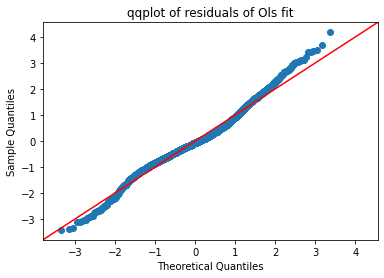

In [222]:
resid=model.resid 
Probplot=sm.ProbPlot(resid,stats.norm,fit=True)

Probplot.qqplot(line='45')

plt.title('qqplot of residuals of Ols fit')
plt.show()

In [223]:
#by these analysis we can say that revenue generated depends on external factors like airing time, day, month etc.

In [224]:
#now we will check whether there is linear dependence of revenue on factors that we found

def fun(x,y):
    plt.figure(figsize=(6,4))
    for i in x.columns:
        sns.scatterplot(x=x[i],y=y)
        plt.xlabel(i)
        plt.ylabel('Revenue')
        plt.show()

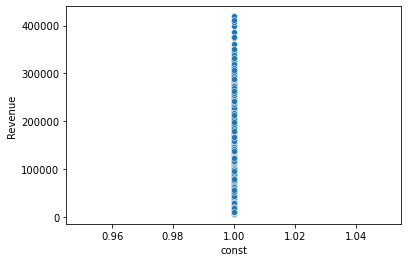

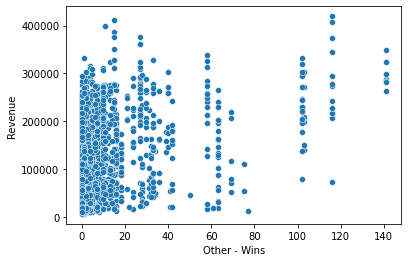

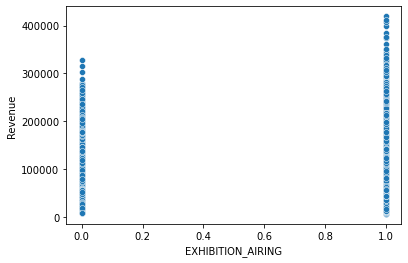

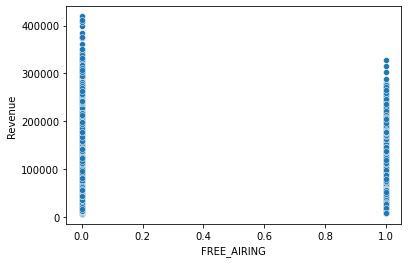

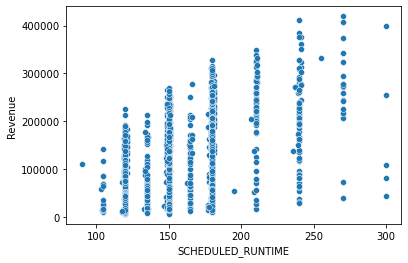

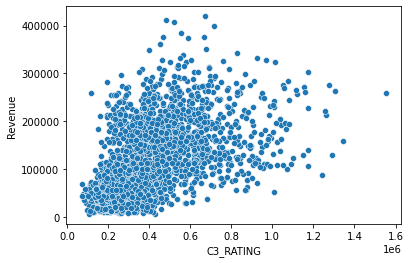

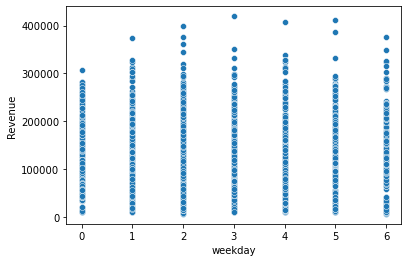

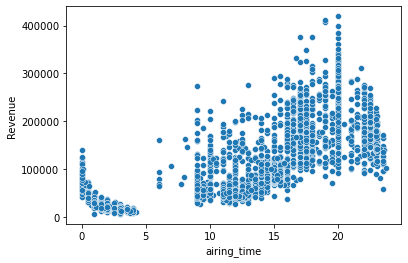

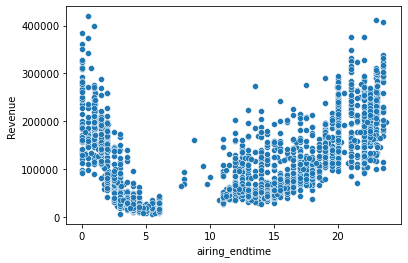

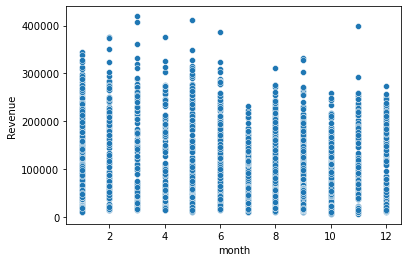

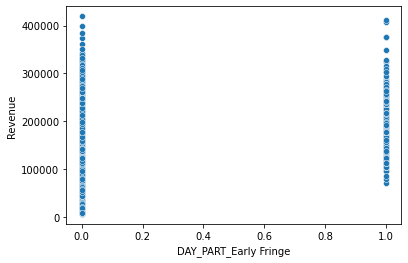

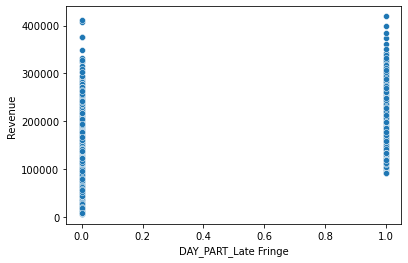

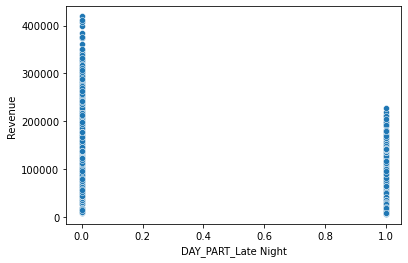

In [225]:
fun(x,y)

In [231]:
X=x

from sklearn.preprocessing import StandardScaler

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

s=StandardScaler()

X_train=s.fit_transform(X_train)

X_test=s.transform(X_test)
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error,mean_absolute_percentage_error
from statsmodels.stats.outliers_influence import variance_inflation_factor

from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from yellowbrick.regressor import ResidualsPlot
from mlxtend.feature_selection import SequentialFeatureSelector
import warnings
rf = RandomForestRegressor()
grid_list = {'max_depth':[10, 15, 50, 100], 'bootstrap': [False, True], 
             'min_samples_leaf': [2, 4], 'min_samples_split': [5, 10],
             'n_estimators':[25, 50, 100], 'max_features': [0.5]}

rf_grid_search = GridSearchCV(estimator = rf, param_grid = grid_list, cv = 5, n_jobs = 4)
rf_grid_search.fit(X_train, y_train)

print(rf_grid_search.best_params_)
print(rf_grid_search.best_score_)
rf_best_model = rf_grid_search.best_estimator_

### Predicting and checking accuracy
y_train_pred = rf_best_model.predict(X_train)

print("-----------------------------------------------------")
print("Training")
print('RMSE: ' + str(np.sqrt(mean_squared_error(y_train, y_train_pred))))
print('MAE: ' + str(mean_absolute_error(y_train, y_train_pred)))
print('R-squared: ' + str(r2_score(y_train, y_train_pred)))
print("\n")

y_test_pred = rf_best_model.predict(X_test)

print("Testing")
print('RMSE: ' + str(np.sqrt(mean_squared_error(y_test, y_test_pred)))) 
print('MAE: ' + str(mean_absolute_error(y_test, y_test_pred)))
print('R-squared: ' + str(r2_score(y_test, y_test_pred)))

{'bootstrap': False, 'max_depth': 10, 'max_features': 0.5, 'min_samples_leaf': 2, 'min_samples_split': 10, 'n_estimators': 50}
0.921311302997663
-----------------------------------------------------
Training
RMSE: 12852.21070564377
MAE: 8707.971677714191
R-squared: 0.972149097910834


Testing
RMSE: 21661.157416418093
MAE: 13941.672728067511
R-squared: 0.9206165379558207
